In [1]:
# basic modules 
import pandas as pd
import numpy as np
# data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns 
# supress warnings
import warnings
warnings.filterwarnings('ignore')
#increase view limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("C:/Users/Saurabh Kadam/archive/Lead Scoring.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
df.duplicated().sum()

0

In [6]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.columns = df.columns.str.replace(' ','_').str.lower()


df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [9]:
df.rename(columns=
          {'totalvisits': 'total_visits',
           'total_time_spent_on_website': 'time_on_website', 
           'how_did_you_hear_about_x_education': 'source',
           'what_is_your_current_occupation': 'occupation',
           'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
           'receive_more_updates_about_our_courses': 'courses_updates', 
           'update_me_on_supply_chain_content': 'supply_chain_content_updates',
           'get_updates_on_dm_content': 'dm_content_updates',
           'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
            'a_free_copy_of_mastering_the_interview': 'mastering_interview'},
          inplace = True)

df.columns.to_list()

['prospect_id',
 'lead_number',
 'lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'converted',
 'total_visits',
 'time_on_website',
 'page_views_per_visit',
 'last_activity',
 'country',
 'specialization',
 'source',
 'occupation',
 'course_selection_reason',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'courses_updates',
 'tags',
 'lead_quality',
 'supply_chain_content_updates',
 'dm_content_updates',
 'lead_profile',
 'city',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'cheque_payment',
 'mastering_interview',
 'last_notable_activity']

In [10]:
df.drop(['prospect_id'],axis=1,inplace=True)

In [11]:
df_non_numeric=df.select_dtypes(include='object')

columns_with_select=df_non_numeric.columns[df_non_numeric.apply(lambda x : x.str.contains('Select',na=False)).any()]
columns_with_select.to_list()

['specialization', 'source', 'lead_profile', 'city']

In [12]:
select=columns_with_select.to_list()
df[select]=df[select].replace('Select',np.nan)

In [13]:
(df.isnull().sum()/len(df))*100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

In [14]:
df.drop(
    [
    'source',
    'lead_quality',
    'lead_profile',
    'asymmetrique_activity_index',
    'asymmetrique_profile_index',
    'asymmetrique_activity_score',
    'asymmetrique_profile_score',
    'last_activity',
    'last_notable_activity',
    'tags'
    ],axis=1,inplace=True)

df.columns

Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'country', 'specialization', 'occupation',
       'course_selection_reason', 'search', 'magazine', 'newspaper_article',
       'x_education_forums', 'newspaper', 'digital_advertisement',
       'through_recommendations', 'courses_updates',
       'supply_chain_content_updates', 'dm_content_updates', 'city',
       'cheque_payment', 'mastering_interview'],
      dtype='object')

In [15]:
(df.isnull().sum()/len(df))*100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [16]:
df.country.value_counts(normalize=True,dropna=False)*100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

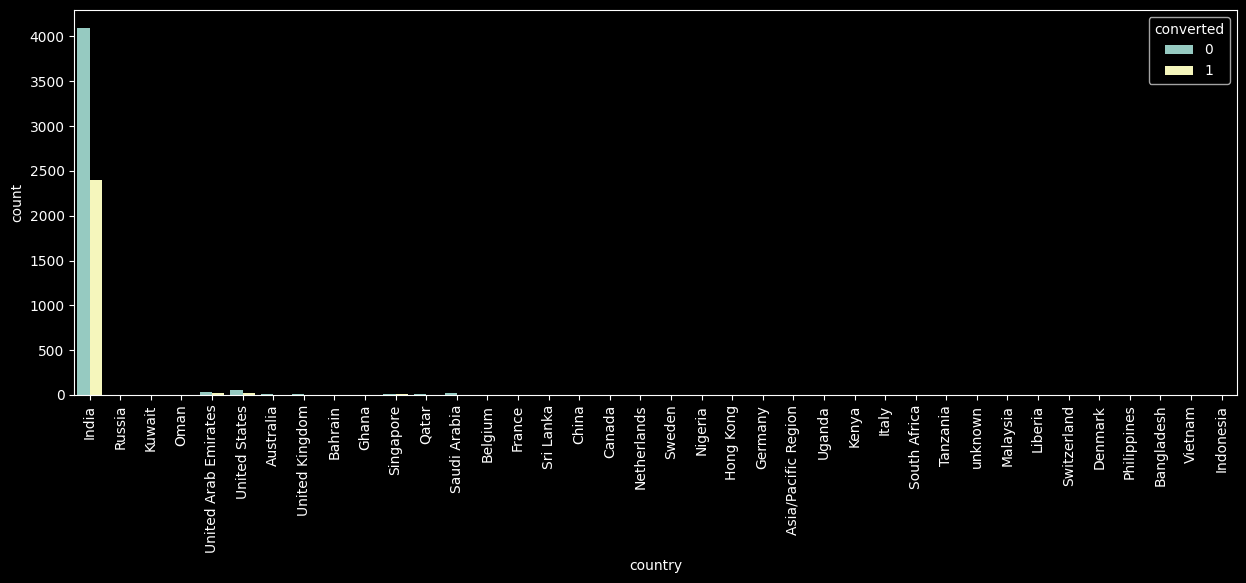

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.country,hue=df.converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
df.drop('country',axis=1,inplace=True)

In [19]:
df.course_selection_reason.value_counts(normalize=True,dropna=False)*100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

In [20]:
df.drop('course_selection_reason',axis=1,inplace=True)

In [21]:
df.occupation.value_counts(normalize=True,dropna=False)*100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

In [22]:
df['occupation'].replace(np.nan, 'Unemployed',inplace=True)

In [23]:
df.occupation.value_counts(normalize=True,dropna=False)*100

Unemployed             89.72
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

In [25]:
df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [26]:
df['specialization'].replace(np.nan,'Not Specified',inplace=True)

In [27]:
df.specialization.value_counts(normalize = True) * 100

Not Specified                       36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [28]:
df['specialization'].replace(['Finance Management','Human Resource Management','Marketing Management',
                                 'Operations Management','IT Projects Management','Supply Chain Management',
                                 'Healthcare Management','Hospitality Management','Retail Management'],
                                 'Management', inplace = True)  

In [29]:
df.specialization.value_counts(normalize = True) * 100

Management                          46.03
Not Specified                       36.58
Business Administration              4.36
Banking, Investment And Insurance    3.66
Media and Advertising                2.20
Travel and Tourism                   2.20
International Business               1.93
E-COMMERCE                           1.21
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [30]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

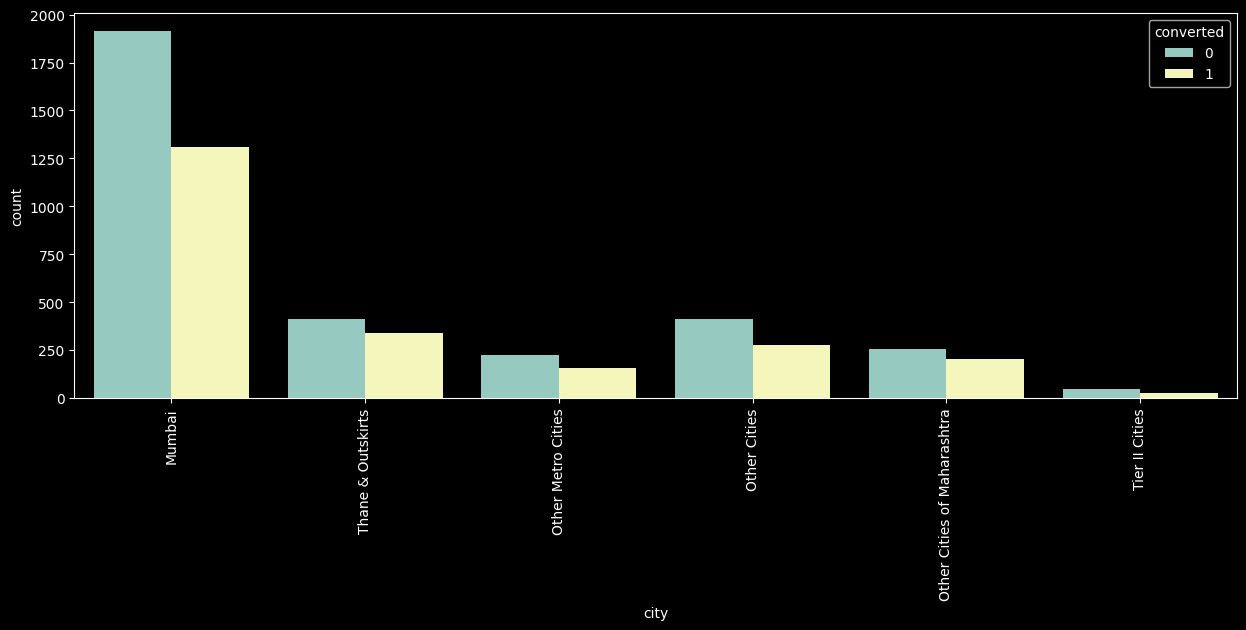

In [31]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1 = sns.countplot(x=df.city, hue = df.converted)
plt.xticks(rotation=90)
plt.show()

In [32]:
df['city'].replace(np.nan,df['city'].mode()[0],inplace=True)

In [33]:
df.isnull().sum()/len(df)*100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [34]:
df.select_dtypes(include='object').nunique()

lead_origin                      5
lead_source                     21
do_not_email                     2
do_not_call                      2
specialization                  11
occupation                       6
search                           2
magazine                         1
newspaper_article                2
x_education_forums               2
newspaper                        2
digital_advertisement            2
through_recommendations          2
courses_updates                  1
supply_chain_content_updates     1
dm_content_updates               1
city                             6
cheque_payment                   1
mastering_interview              2
dtype: int64

In [35]:
df.lead_source.value_counts(normalize=True,dropna=False)*100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [38]:
df.lead_source.mode()[0]

'Google'

In [39]:
df.lead_source.fillna('Google',inplace=True)

In [40]:
df['lead_source'] = df['lead_source'].replace('google','Google')
df['lead_source'] = df['lead_source'].replace('Facebook','Social Media')

In [41]:
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [42]:
df.lead_source.value_counts(normalize=True,dropna=False)*100

Google               31.48
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Other Social Sites    3.73
Name: lead_source, dtype: float64

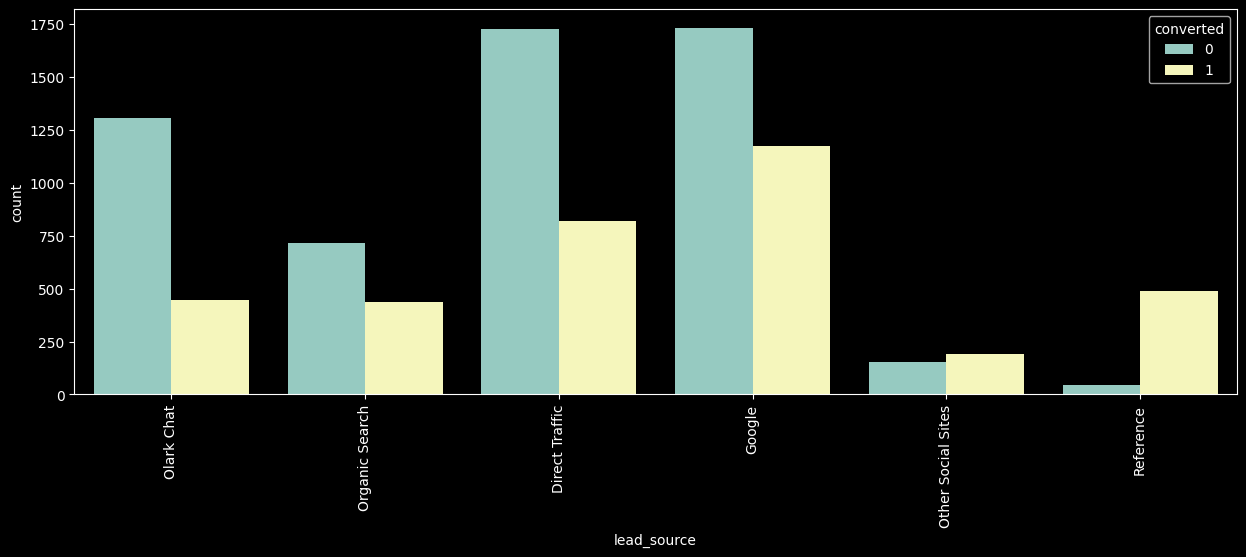

In [43]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1 = sns.countplot(x=df['lead_source'], hue = df.converted)
plt.xticks(rotation=90)
plt.show()

In [44]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

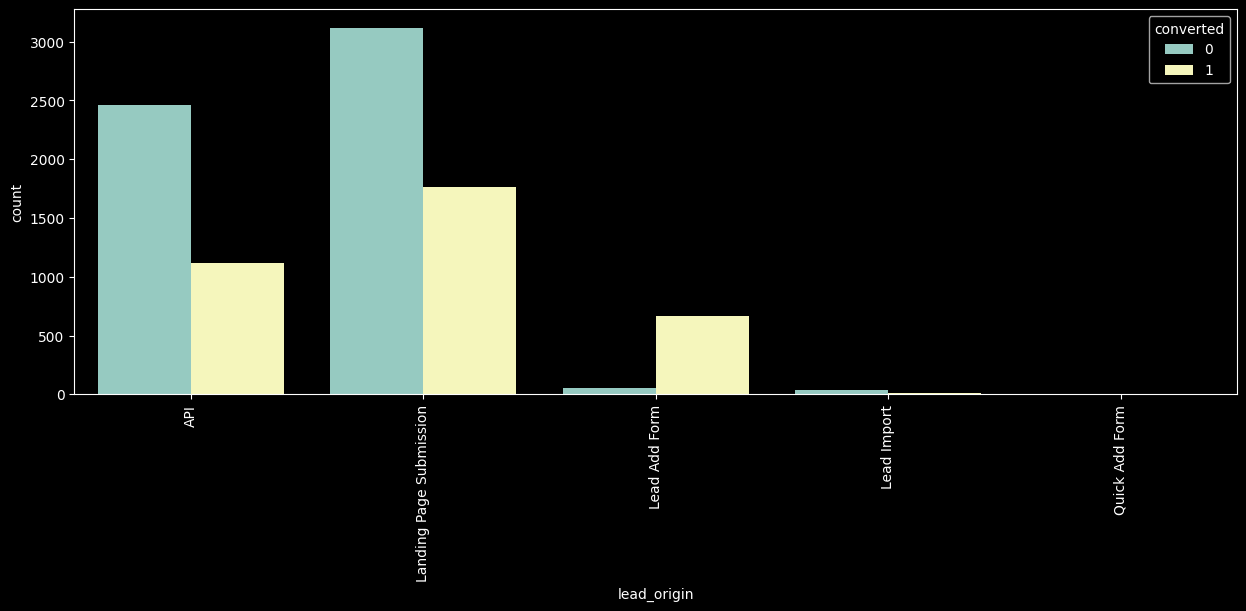

In [45]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
s1 = sns.countplot(x=df['lead_origin'], hue = df.converted)
plt.xticks(rotation=90)
plt.show()

In [46]:
df.select_dtypes(include='object').nunique()

lead_origin                      5
lead_source                      6
do_not_email                     2
do_not_call                      2
specialization                  11
occupation                       6
search                           2
magazine                         1
newspaper_article                2
x_education_forums               2
newspaper                        2
digital_advertisement            2
through_recommendations          2
courses_updates                  1
supply_chain_content_updates     1
dm_content_updates               1
city                             6
cheque_payment                   1
mastering_interview              2
dtype: int64

In [47]:
df.drop(['cheque_payment','courses_updates','supply_chain_content_updates','dm_content_updates','cheque_payment','magazine'],axis=1,inplace=True)

In [48]:
col=['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']

df_binary=df[col]

for _ in df_binary.columns:
    print(df_binary[_].value_counts(normalize=True)*100)

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64
No    99.98
Yes    0.02
Name: do_not_call, dtype: float64
No    99.85
Yes    0.15
Name: search, dtype: float64
No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64
No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64
No    99.99
Yes    0.01
Name: newspaper, dtype: float64
No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64
No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64
No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64


In [49]:
    df.drop(['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
               'newspaper', 'digital_advertisement', 'through_recommendations','mastering_interview'],axis=1,inplace=True)

In [50]:
df.lead_number=df.lead_number.astype('object')

In [51]:
plt.style.use('bmh')

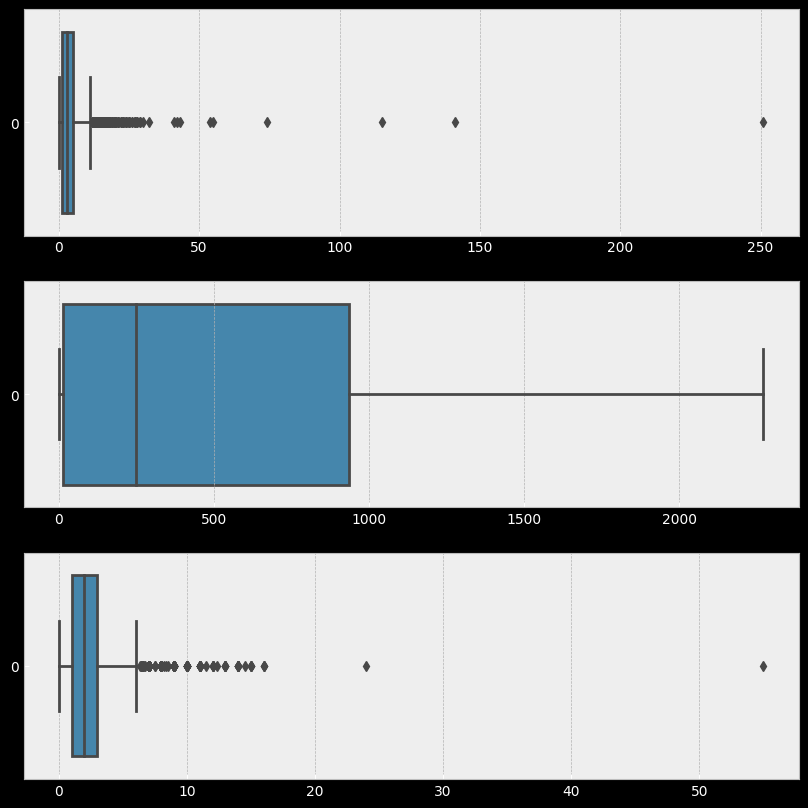

In [52]:
req_columns=['total_visits','time_on_website','page_views_per_visit']

plt.figure(figsize=(10,10))
for _ in enumerate(req_columns):
    plt.subplot(len(req_columns),1,_[0]+1)
    sns.boxplot(df[_[1]].dropna(),orient='h')

In [53]:
df.total_visits.fillna(df.total_visits.median(),inplace=True)
df.total_visits = df.total_visits.astype('int')


In [54]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(),inplace=True)

In [55]:
df.drop('do_not_email',axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   converted             9240 non-null   int64  
 4   total_visits          9240 non-null   int32  
 5   time_on_website       9240 non-null   int64  
 6   page_views_per_visit  9240 non-null   float64
 7   specialization        9240 non-null   object 
 8   occupation            9240 non-null   object 
 9   city                  9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 685.9+ KB


In [57]:
plt.style.use('ggplot')

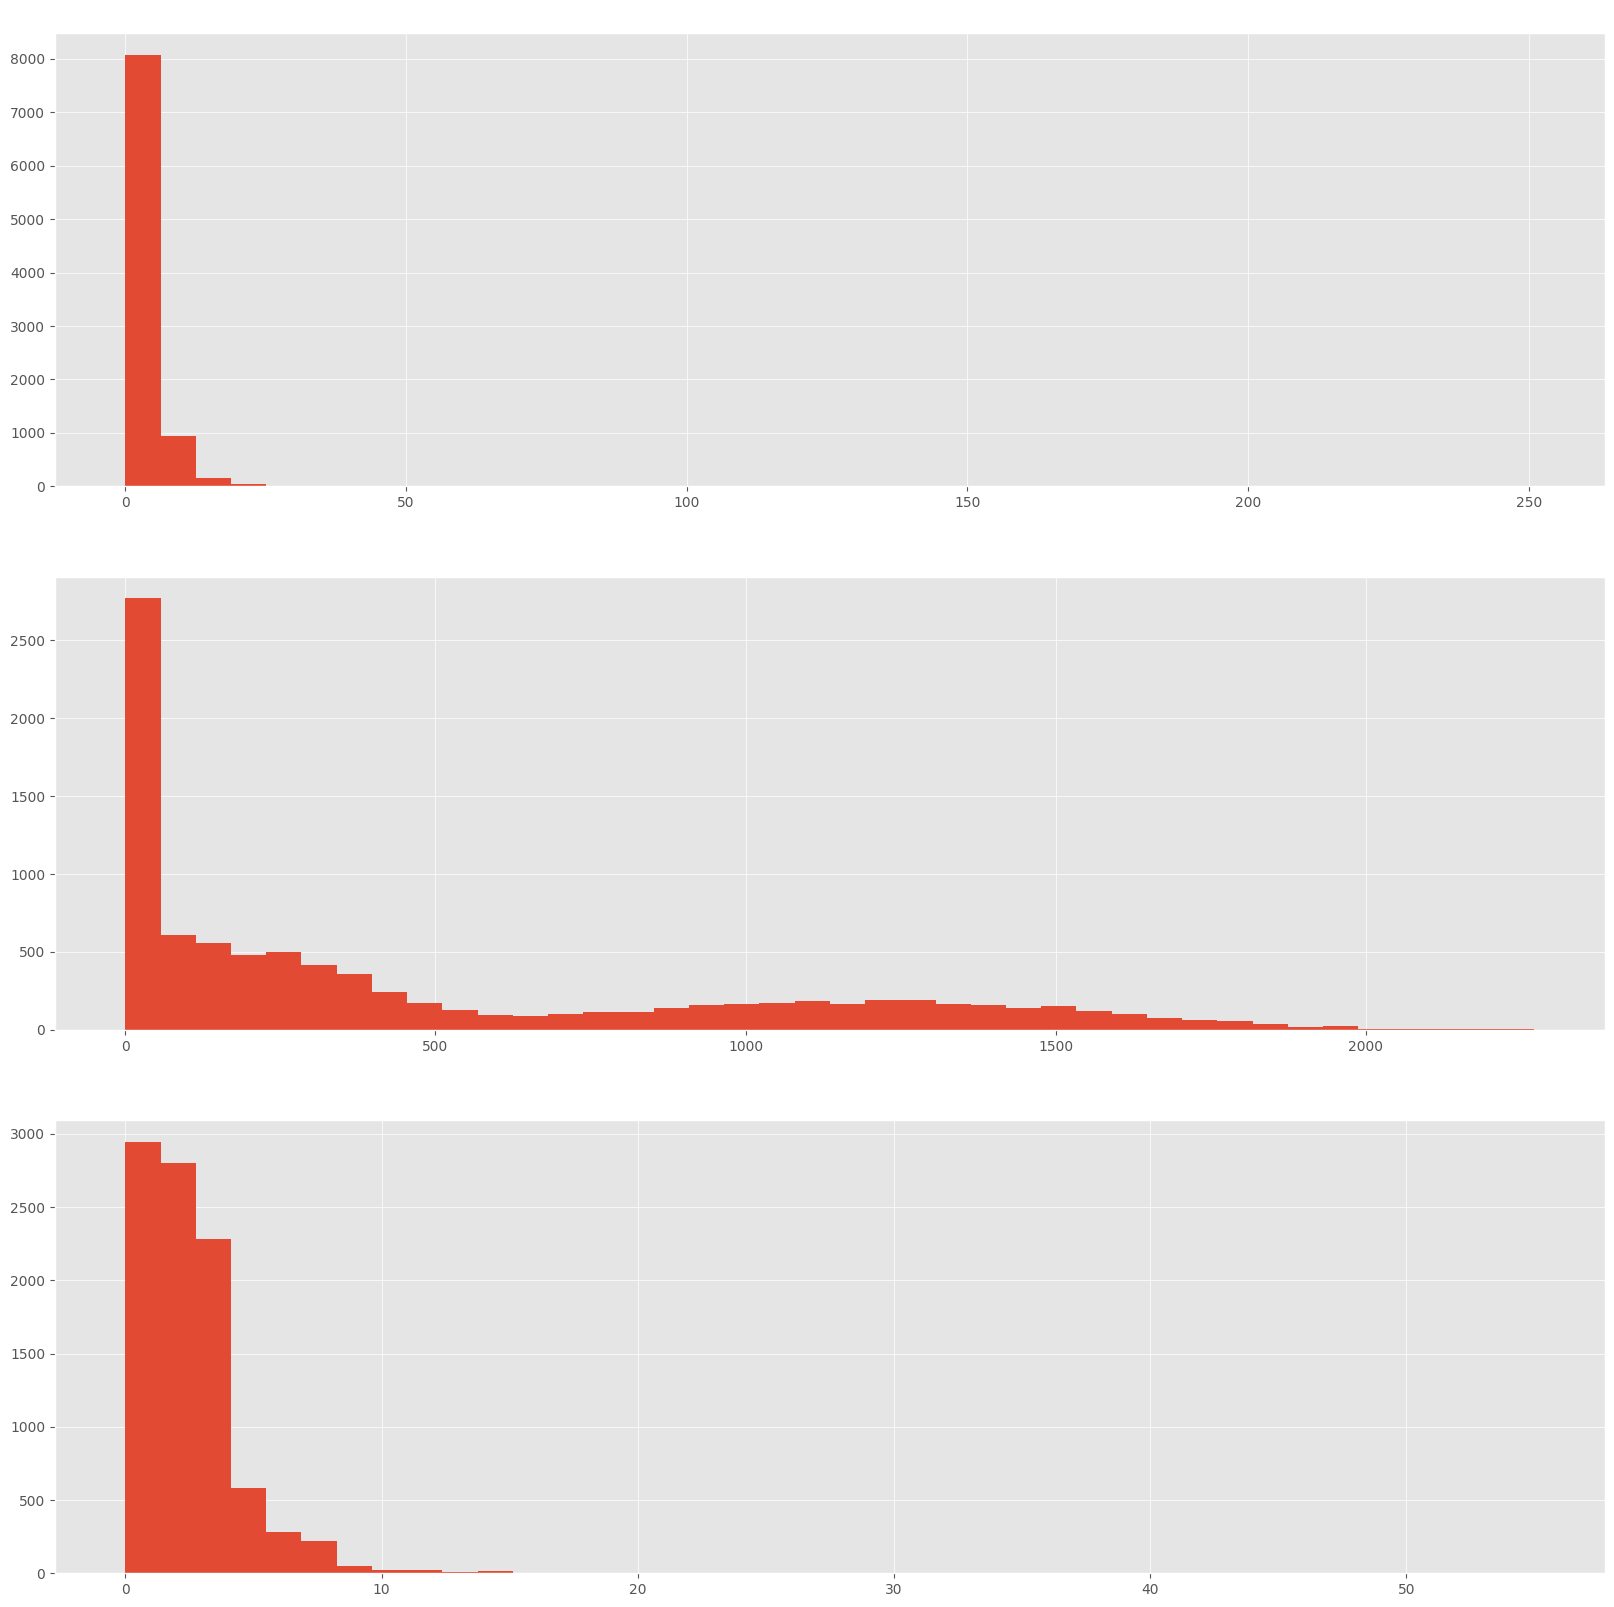

In [58]:
titles=['Total website visits','Total time spent on websites','Average number of page views per visit']
plt.figure(figsize=(20,20))
for _ in enumerate(req_columns):
    plt.subplot(len(req_columns),1,_[0]+1)
    plt.hist(df[_[1]].dropna(),bins=40)
    x=_[0]
    plt.title(titles[x])
    plt.show

<Axes: >

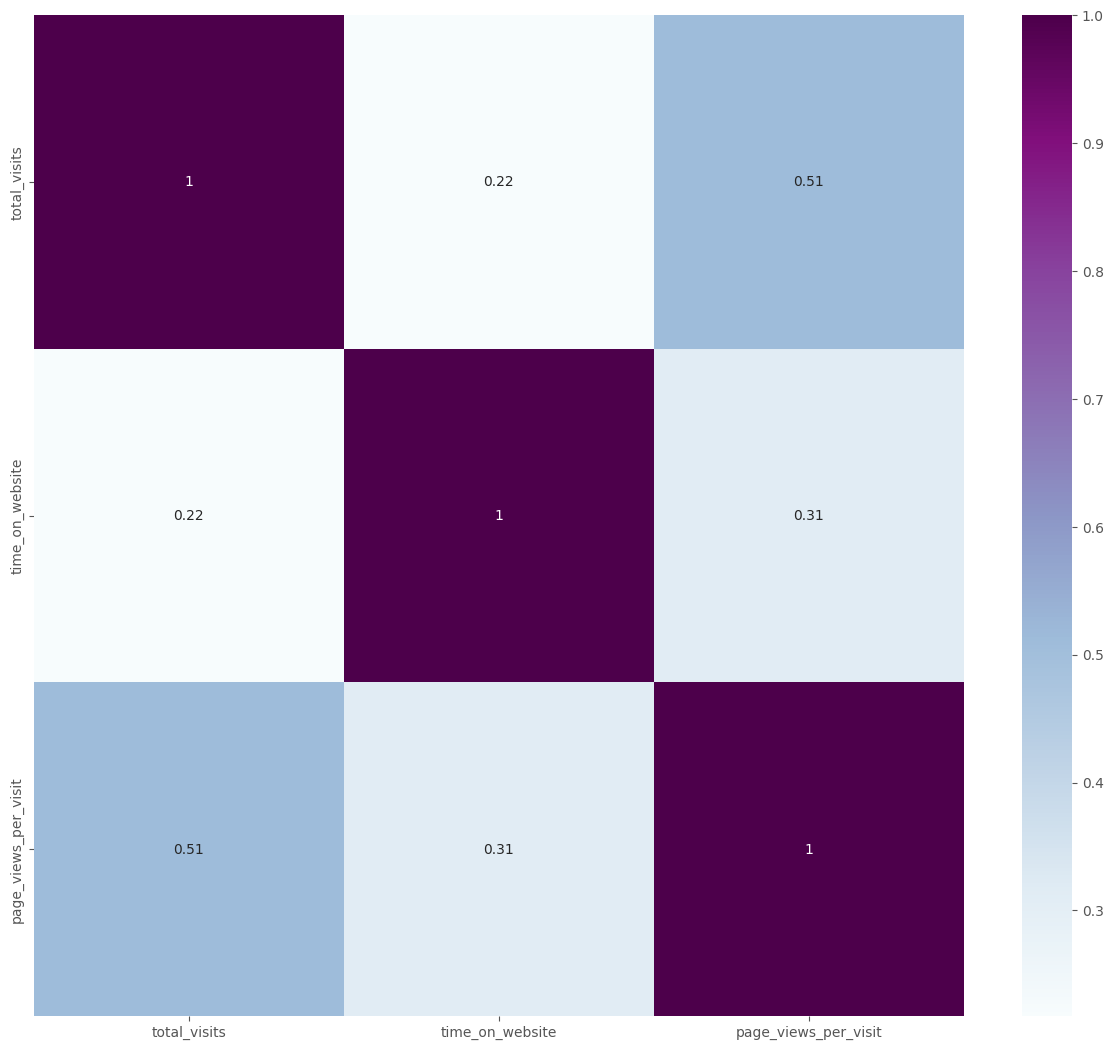

In [59]:
plt.figure(figsize=(15,13))
sns.heatmap(df[req_columns].corr(),cmap='BuPu',annot=True)

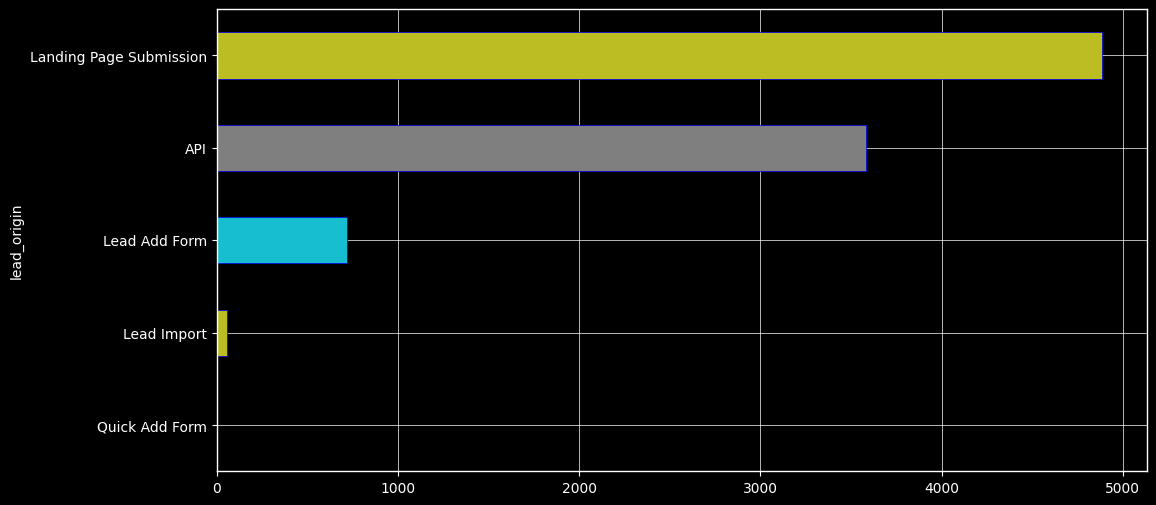

In [60]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
x=df.groupby('lead_origin')
x['lead_number'].count().sort_values().plot(kind='barh',edgecolor='b',color=['#7f7f7f', '#bcbd22', '#17becf'])
plt.show()

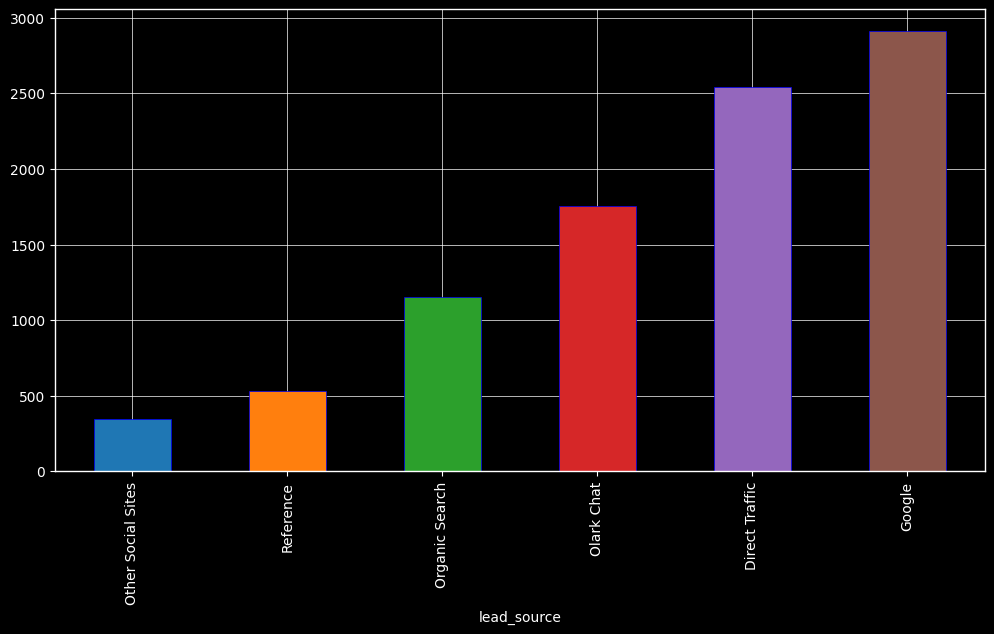

In [61]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
x=df.groupby('lead_source')
x['lead_number'].count().sort_values().plot(kind='bar',edgecolor='b',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b'])
plt.show()

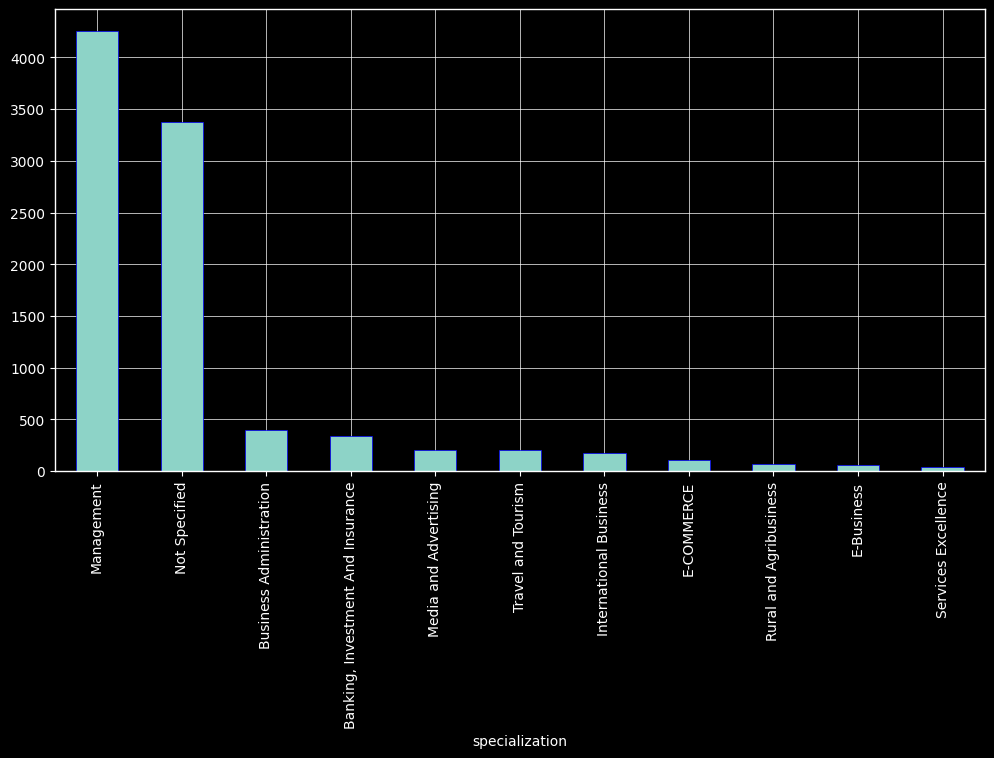

In [62]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
x=df.groupby('specialization')
x['lead_number'].count().sort_values(ascending= False).plot(kind='bar',edgecolor='b')
plt.show()

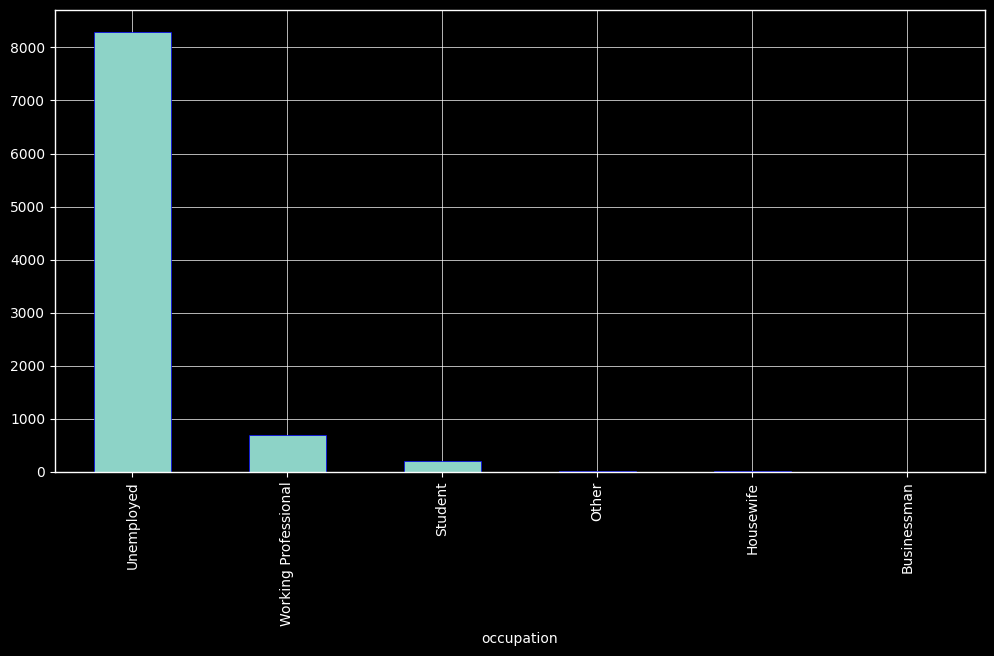

In [63]:
plt.figure(figsize=(12,6))
x=df.groupby('occupation')
x['lead_number'].count().sort_values(ascending= False).plot(kind='bar',edgecolor='b')
plt.show()

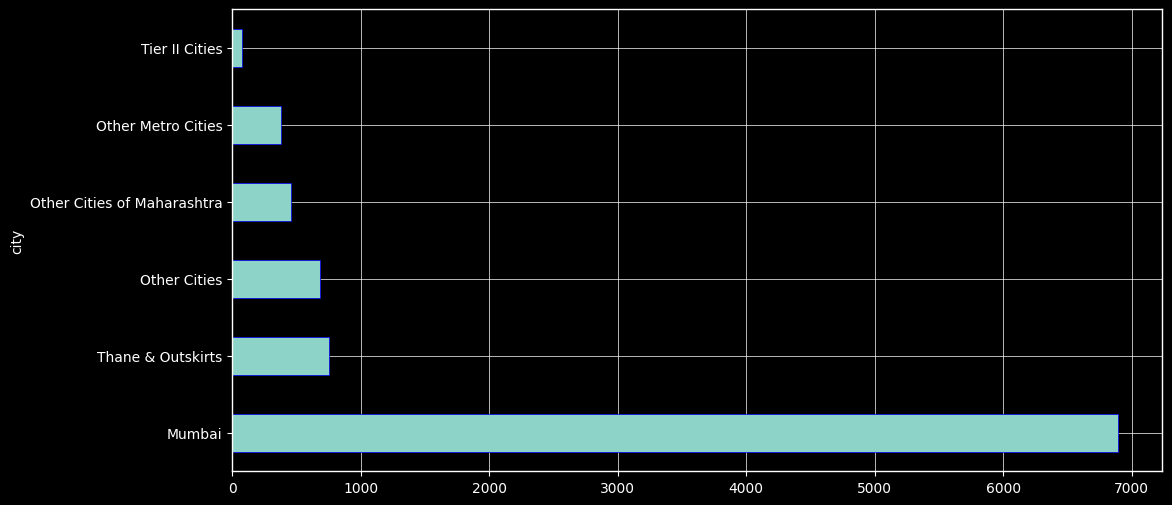

In [64]:
plt.figure(figsize=(12,6))
x=df.groupby('city')
x['lead_number'].count().sort_values(ascending= False).plot(kind='barh',edgecolor='b')
plt.show()

In [65]:
df.select_dtypes(include='object').nunique()

lead_number       9240
lead_origin          5
lead_source          6
specialization      11
occupation           6
city                 6
dtype: int64